In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df  = pd.read_pickle('acc_df.pkl')

In [3]:
df.head()

,DATE_,GROUPE_ACCIDENT,COMMUNE,CONDITIONS_LUMINEUSES,CONDITIONS_METEO,CONSEQUENCES,COOR_X,COOR_Y,ETAT_ROUTE,GENRE_ROUTE,...,DayTime,SEASON,CAUSE_g,CAUSE_sg,ENFANTS_IMPLIQUES,NB_MOTO,NB_BIKE,NB_TPubl,NB_ProfT,NB_LourdT
0,2010-11-30,Dérapage ou perte de maîtrise,Genève,Nuit,Chute de neige,Avec blessés légers,6.153116,46.200401,Enneigée,Route secondaire,...,Evening,Autumn,Inattention et distraction,Manque d'attention momentané,0,0.0,0.0,0.0,0.0,0.0
1,2010-12-08,Autres,Genève,Jour,Beau,Autres,6.129641,46.206753,Sèche,Route secondaire,...,Afternoon,Winter,Utilisation inadéquate du véhicule,Stationnement sans précautions suffisantes,0,0.0,0.0,0.0,0.0,0.0
2,2010-12-02,Dérapage ou perte de maîtrise,Vandoeuvres,Jour,Couvert,Avec blessés légers,6.202445,46.221384,Enneigée,Route secondaire,...,Morning,Winter,Inobservation de signaux ou de la signalisation,Inobservation des règles de la circulation don...,0,0.0,0.0,0.0,0.0,0.0
3,2010-10-16,Collision frontale,Cologny,Nuit,Couvert,Avec blessés graves,6.180094,46.208173,Humide,Route principale,...,Evening,Autumn,Vitesse,"Inadaptée au tracé de la route (virage serré, ...",0,0.0,0.0,0.0,0.0,0.0
4,2010-09-17,Accident par tamponnement,Conches,Nuit,Pluie,Autres,6.174721,46.199584,Mouillée,Route principale,...,Night,Autumn,Inattention et distraction,Manque d'attention momentané,0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['DATE_', 'GROUPE_ACCIDENT', 'COMMUNE', 'CONDITIONS_LUMINEUSES',
       'CONDITIONS_METEO', 'CONSEQUENCES', 'COOR_X', 'COOR_Y', 'ETAT_ROUTE',
       'GENRE_ROUTE', 'JOUR', 'LOCALITE', 'NB_ENFANTS_IMPLIQUES',
       'NB_ENFANTS_ECOLE', 'NB_BLESSES_LEGERS', 'NB_BLESSES_GRAVES', 'NB_TUES',
       'NB_PIETONS', 'NB_BICYCLETTES', 'NB_VAE_25', 'NB_VAE_45',
       'NB_CYCLOMOTEURS', 'NB_MOTOS_50', 'NB_MOTOS_125', 'NB_MOTOS_11KW',
       'NB_VOITURES_TOURISME', 'NB_VOITURES_LIVRAISON', 'NB_CAMIONS', 'NB_BUS',
       'NB_TRAM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'DayTime', 'SEASON',
       'CAUSE_g', 'CAUSE_sg', 'ENFANTS_IMPLIQUES', 'NB_MOTO', 'NB_BIKE',
       'NB_TPubl', 'NB_ProfT', 'NB_LourdT'],
      dtype='object')

In [22]:
bike_df = df.loc[df.NB_BICYCLETTES>0,['GROUPE_ACCIDENT', 'CONDITIONS_LUMINEUSES',
       'CONDITIONS_METEO', 'CONSEQUENCES', 'COOR_X', 'COOR_Y', 'ETAT_ROUTE',
       'GENRE_ROUTE', 'JOUR','NB_BLESSES_LEGERS', 'NB_BLESSES_GRAVES', 'NB_TUES', 'SEASON',
       'CAUSE_g', 'CAUSE_sg']]

bike_to_cluster = bike_df[['GROUPE_ACCIDENT', 'CONDITIONS_LUMINEUSES','CONDITIONS_METEO','CAUSE_g', 'CAUSE_sg']]


In [45]:
dummy_bike_df =pd.get_dummies(bike_to_cluster,drop_first=True)
X = dummy_bike_df.values

In [34]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[ 0.13172138  0.11375863]
[ 23.53356618  21.87015148]


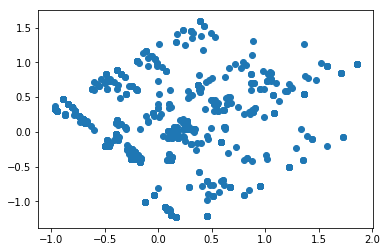

In [56]:
Xhat = pca.transform(X)
plt.pyplot.scatter(Xhat[:,0], Xhat[:,1])
plt.pyplot.show()

In [65]:
to_cluster = df[['GROUPE_ACCIDENT', 'CONDITIONS_LUMINEUSES','CONDITIONS_METEO','CAUSE_g', 'CAUSE_sg']]
dummy_tocluster_df =pd.get_dummies(to_cluster,drop_first=True)
Y = dummy_tocluster_df.values

In [66]:
pca_full = PCA(n_components=30)
pca_full.fit(Y)
Yhat = pca_full.transform(Y)

print(pca_full.explained_variance_ratio_)  # doctest: +ELLIPSIS
print(pca_full.singular_values_)
pca_full.explained_variance_ratio_.sum()

[ 0.14362283  0.10996016  0.09711235  0.07771455  0.06565319  0.05752081
  0.05404687  0.03677131  0.03422651  0.02741682  0.02585328  0.02464045
  0.02060502  0.01999219  0.01825882  0.01508544  0.01350177  0.01327526
  0.0096434   0.00882673  0.00827764  0.00770528  0.00743113  0.00619216
  0.00539537  0.00488686  0.00444186  0.00439112  0.00406344  0.00392033]
[ 96.30127552  84.26320593  79.18766419  70.83884466  65.11007797
  60.94426032  59.07525388  48.72757869  47.01123007  42.07545381
  40.85809454  39.88821516  36.47596531  35.92944133  34.33654773
  31.21039589  29.52674717  29.27802799  24.95371961  23.87372362
  23.11924593  22.30562631  21.905229    19.99592452  18.66512286
  17.76376987  16.9356838   16.83868589  16.1982229   15.910424  ]


0.93043293081698863

Applying GMM to the dataset reduced!

In [74]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=10, covariance_type='diag',max_iter=1000,verbose=1)

In [75]:
GMM.fit(Yhat)

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [80]:
df['group'] = GMM.predict(Yhat)

In [82]:
df.group.value_counts()

5    4342
3    2523
2    2513
0    2177
1    2112
6    1509
8    1360
7     982
4     887
9     826
Name: group, dtype: int64

In [123]:
group0 = df.loc[df.group==5,:]
group1 = df.loc[df.group==3,:]
group2 = df.loc[df.group==2,:]
group3 = df.loc[df.group==0,:]
group4 = df.loc[df.group==1,:]
group5 = df.loc[df.group==6,:]
group6 = df.loc[df.group==8,:]
group7 = df.loc[df.group==7,:]
group8 = df.loc[df.group==4,:]
group9 = df.loc[df.group==9,:]


In [120]:
def investigate_group(df):
    fig, axes = plt.subplots(5,figsize=(20, 60))
    a = sns.countplot(df.CAUSE_g,ax=axes[0])
    b = sns.countplot(df.CAUSE_sg,ax=axes[1])
    c = sns.countplot(df.CONDITIONS_LUMINEUSES,ax=axes[2])
    d = sns.countplot(df.CONDITIONS_METEO,ax=axes[3])
    e = sns.countplot(df.GROUPE_ACCIDENT,ax=axes[4])
    a.set_xticklabels(a.get_xticklabels(), rotation=20)
    e.set_xticklabels(e.get_xticklabels(), rotation=20)
    b.set_xticklabels(b.get_xticklabels(), rotation=20)

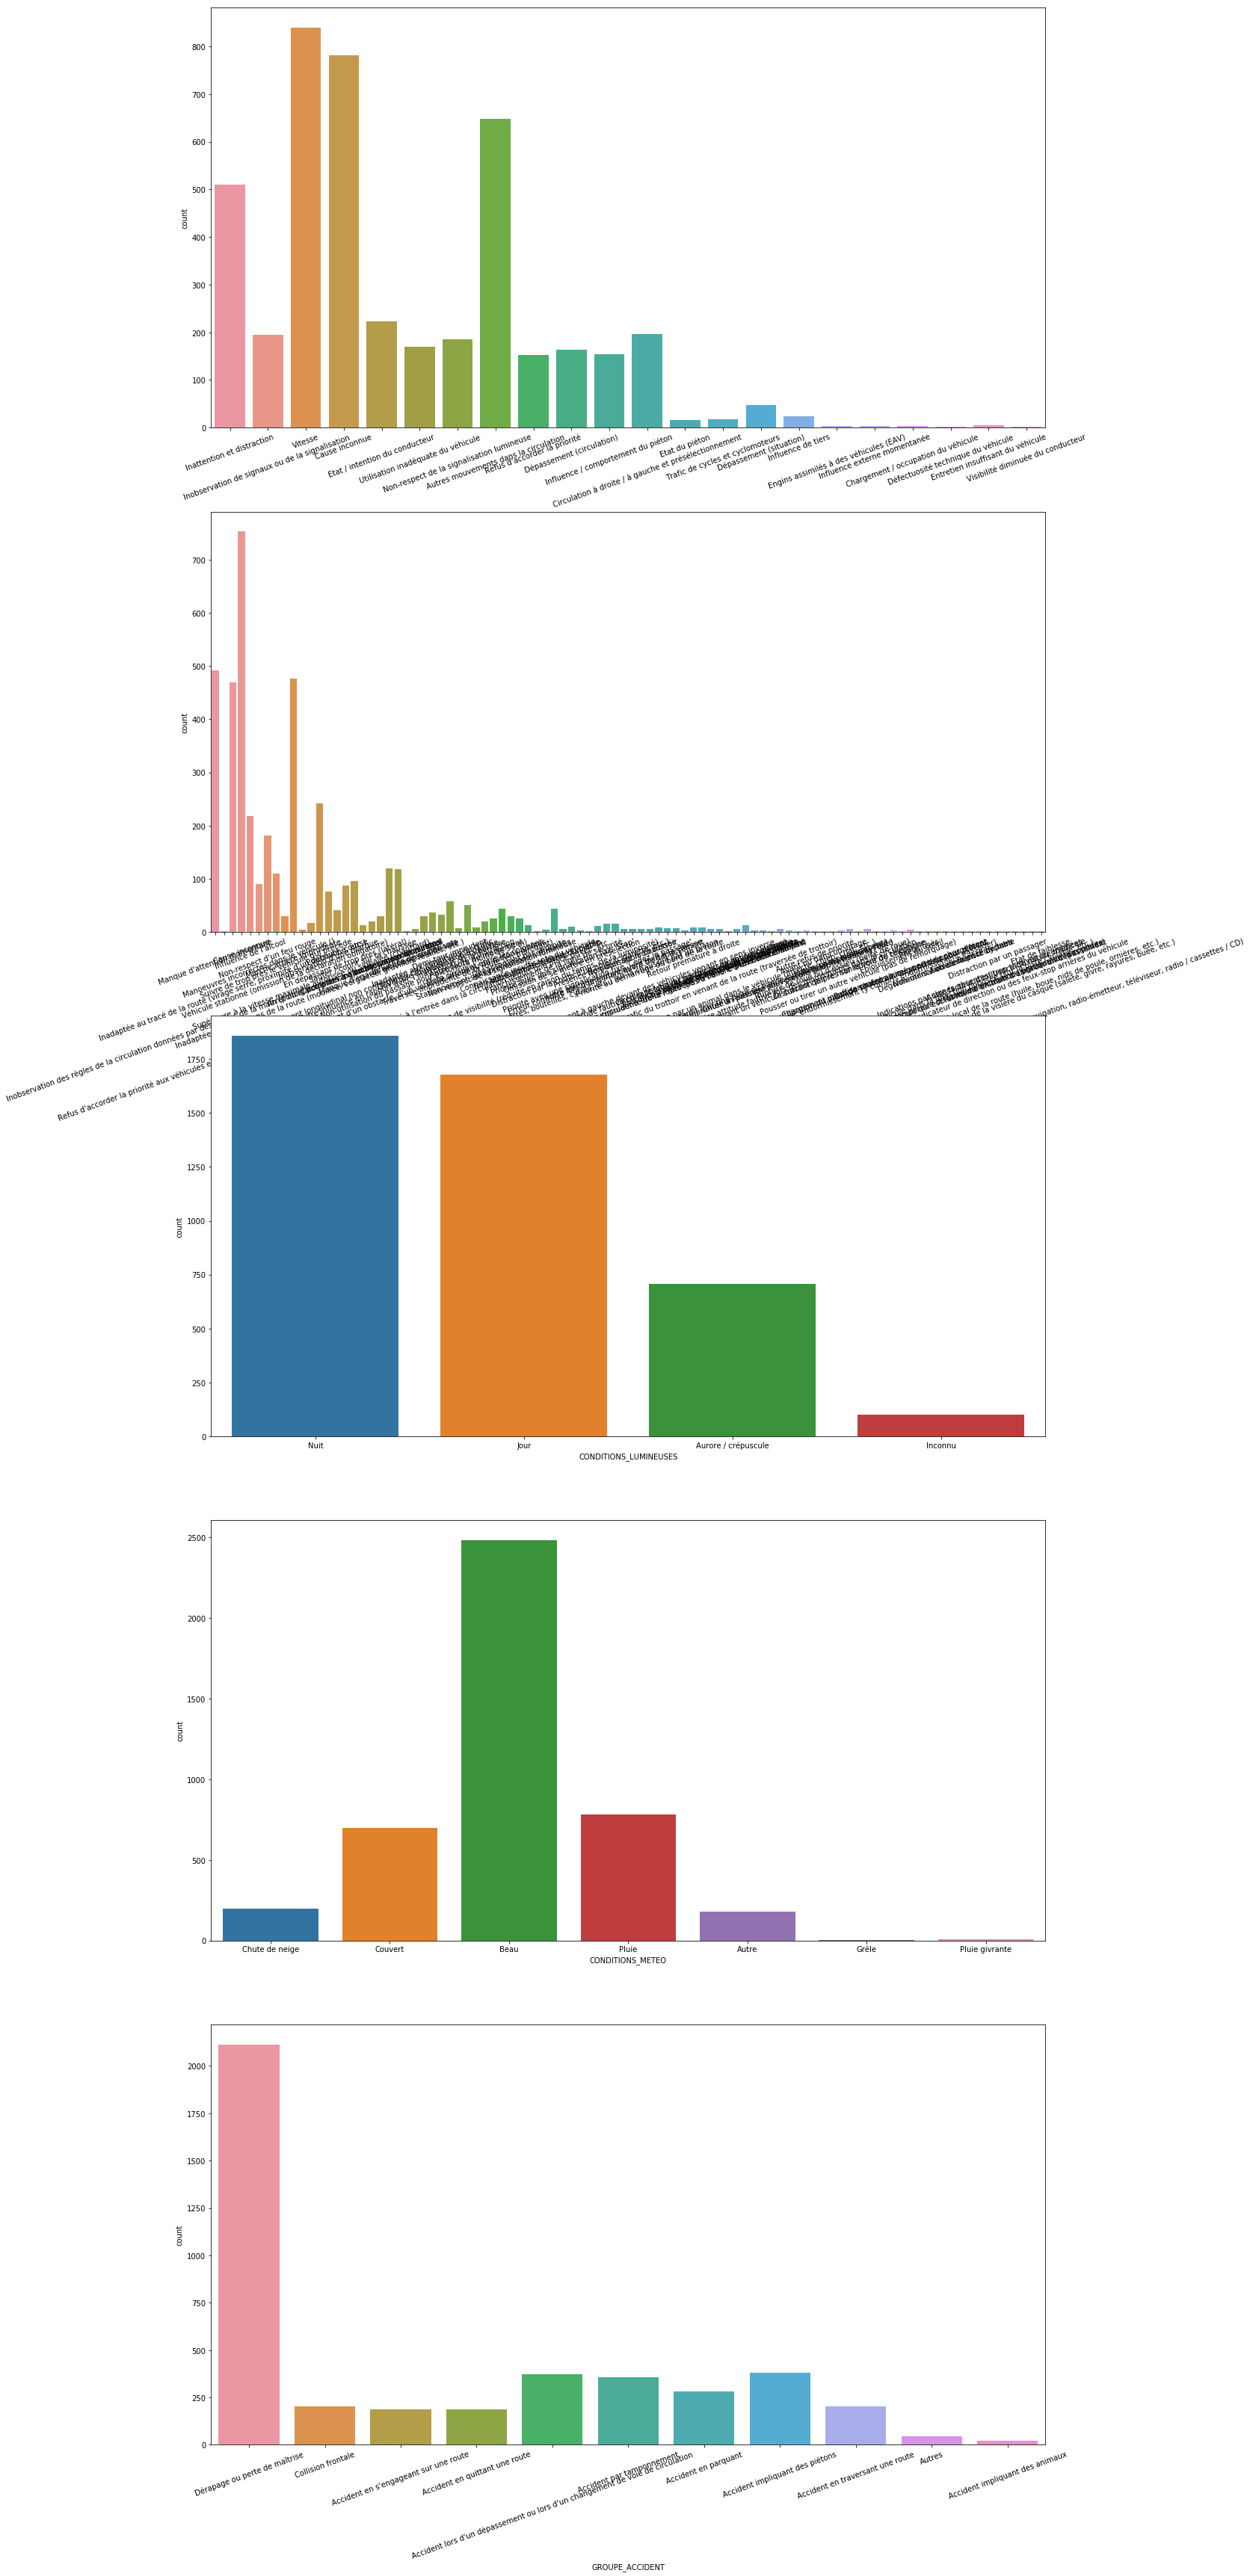

In [124]:
investigate_group(group0)

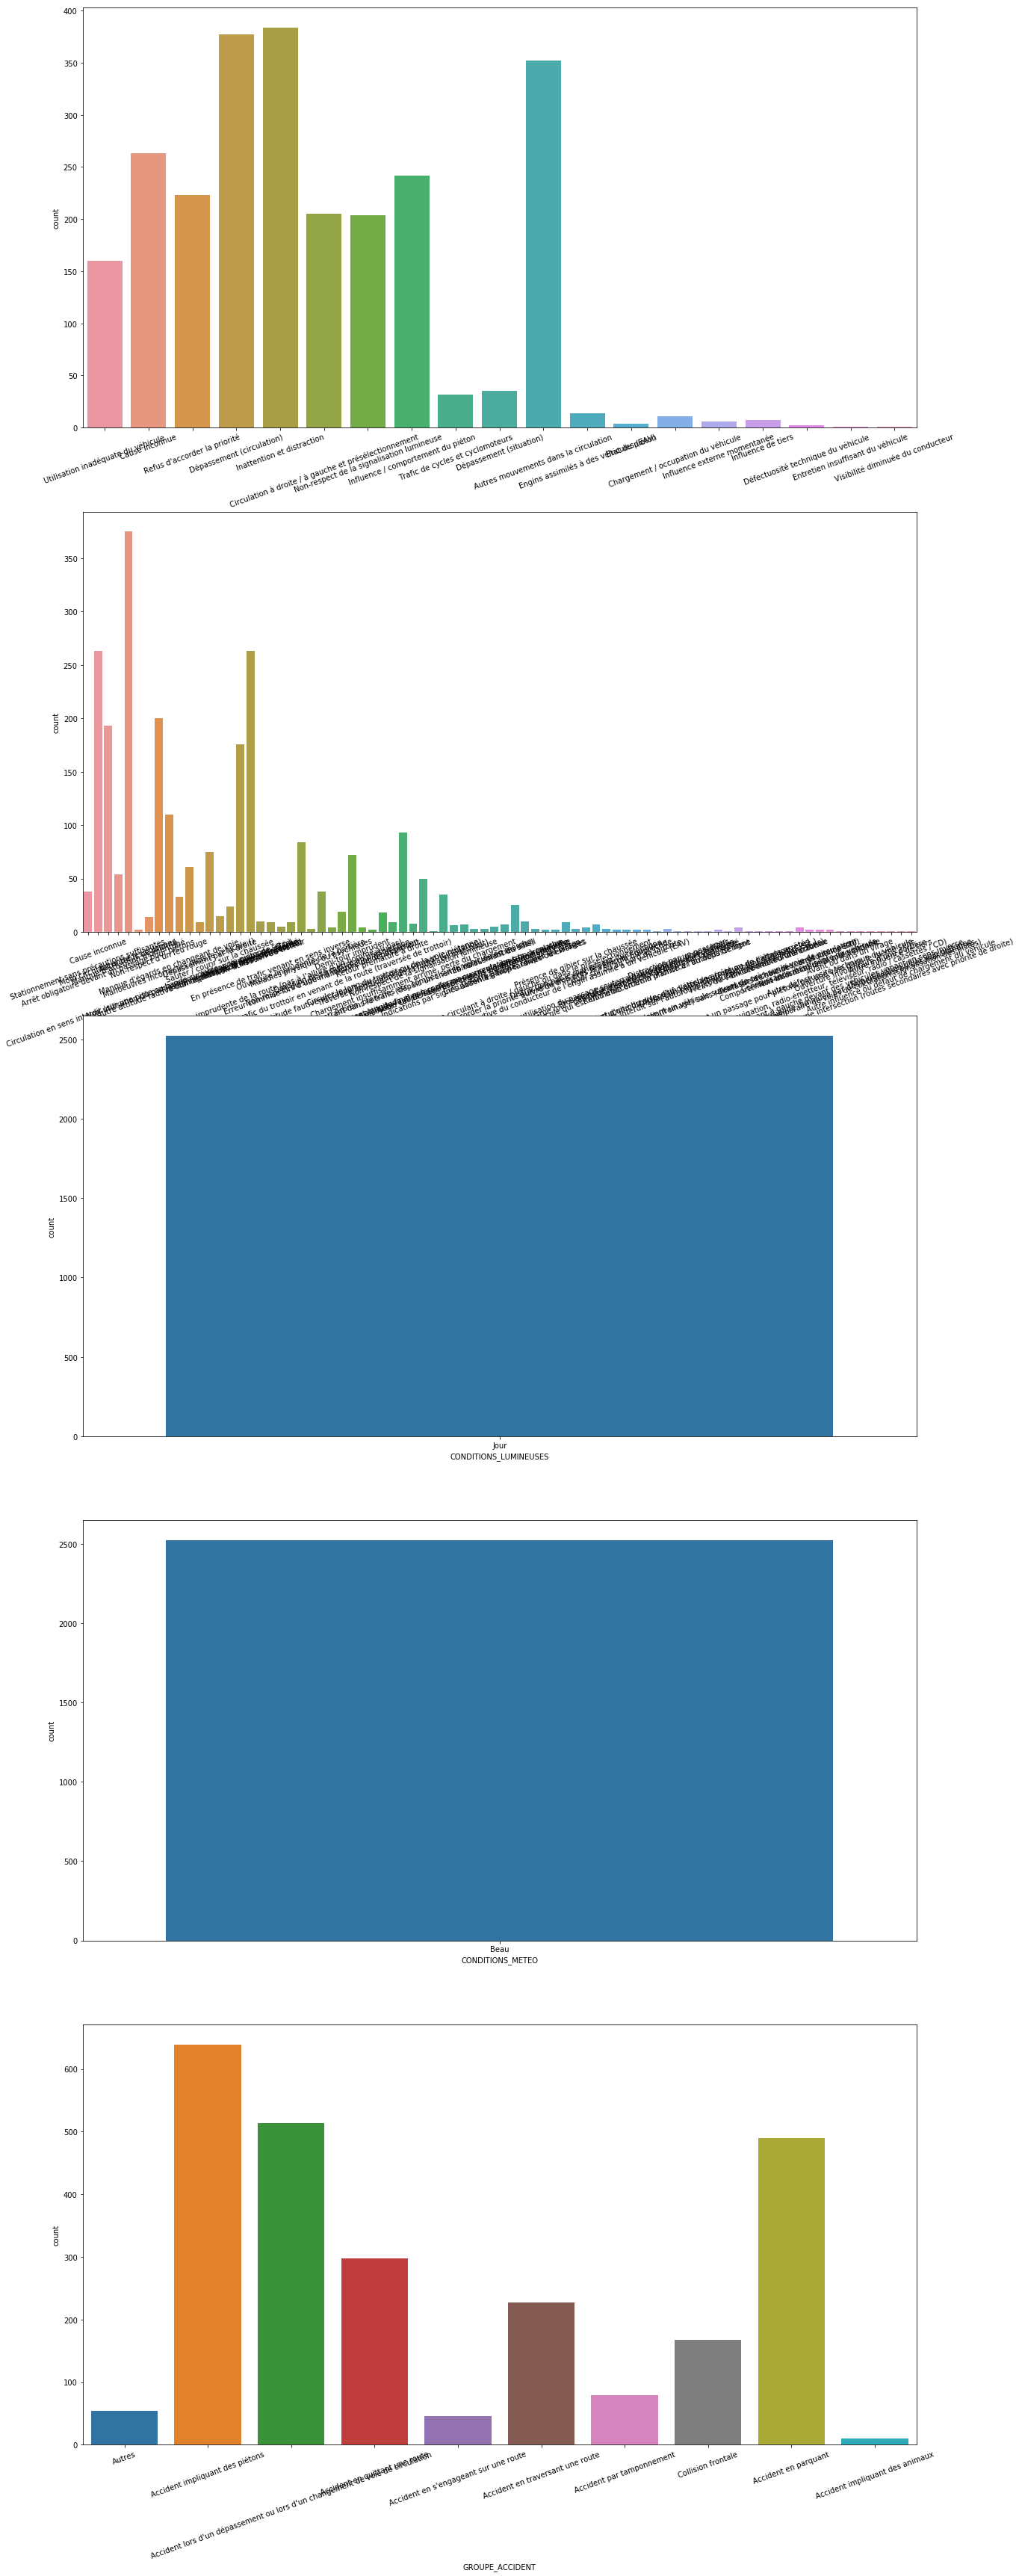

In [125]:
investigate_group(group1)

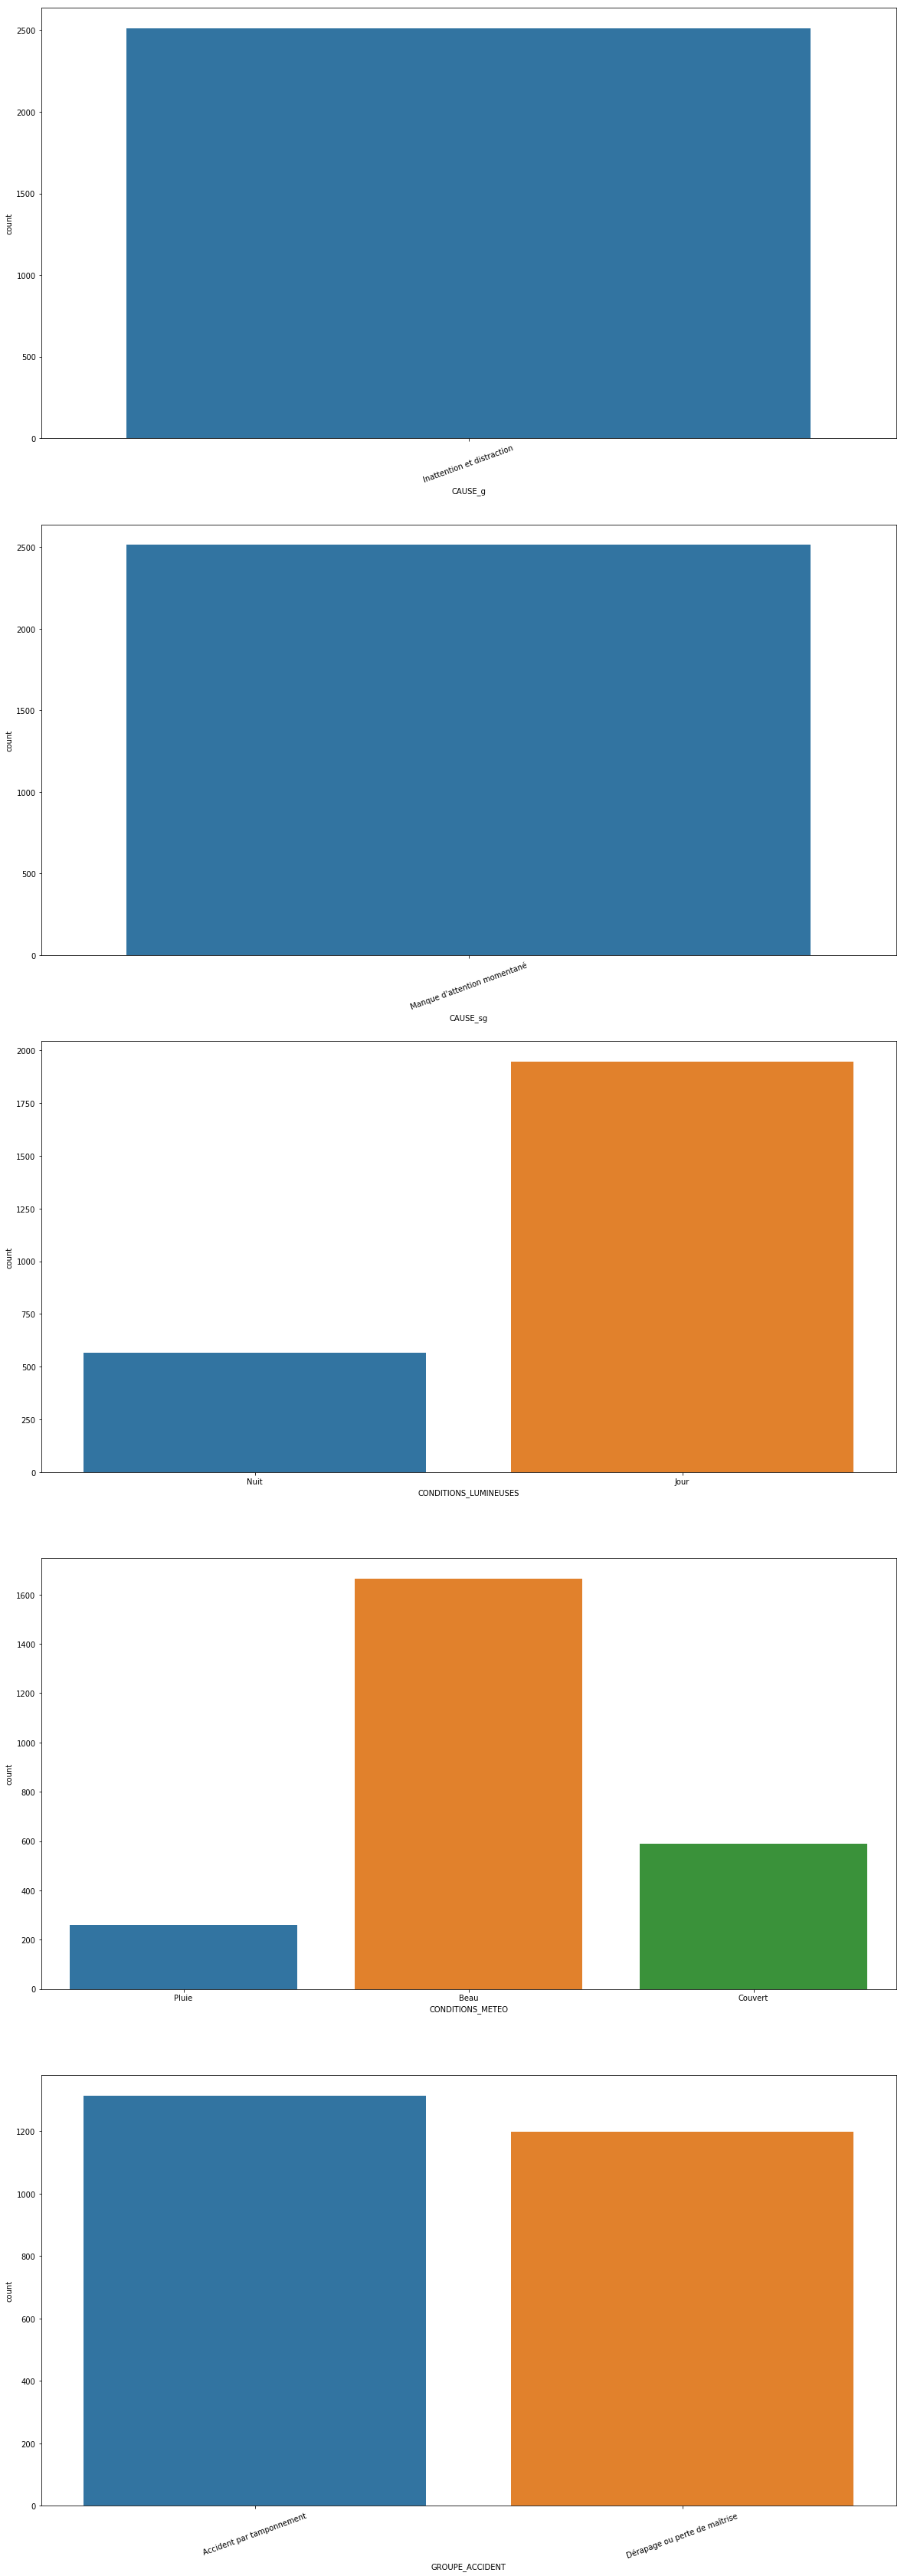

In [126]:
investigate_group(group2)

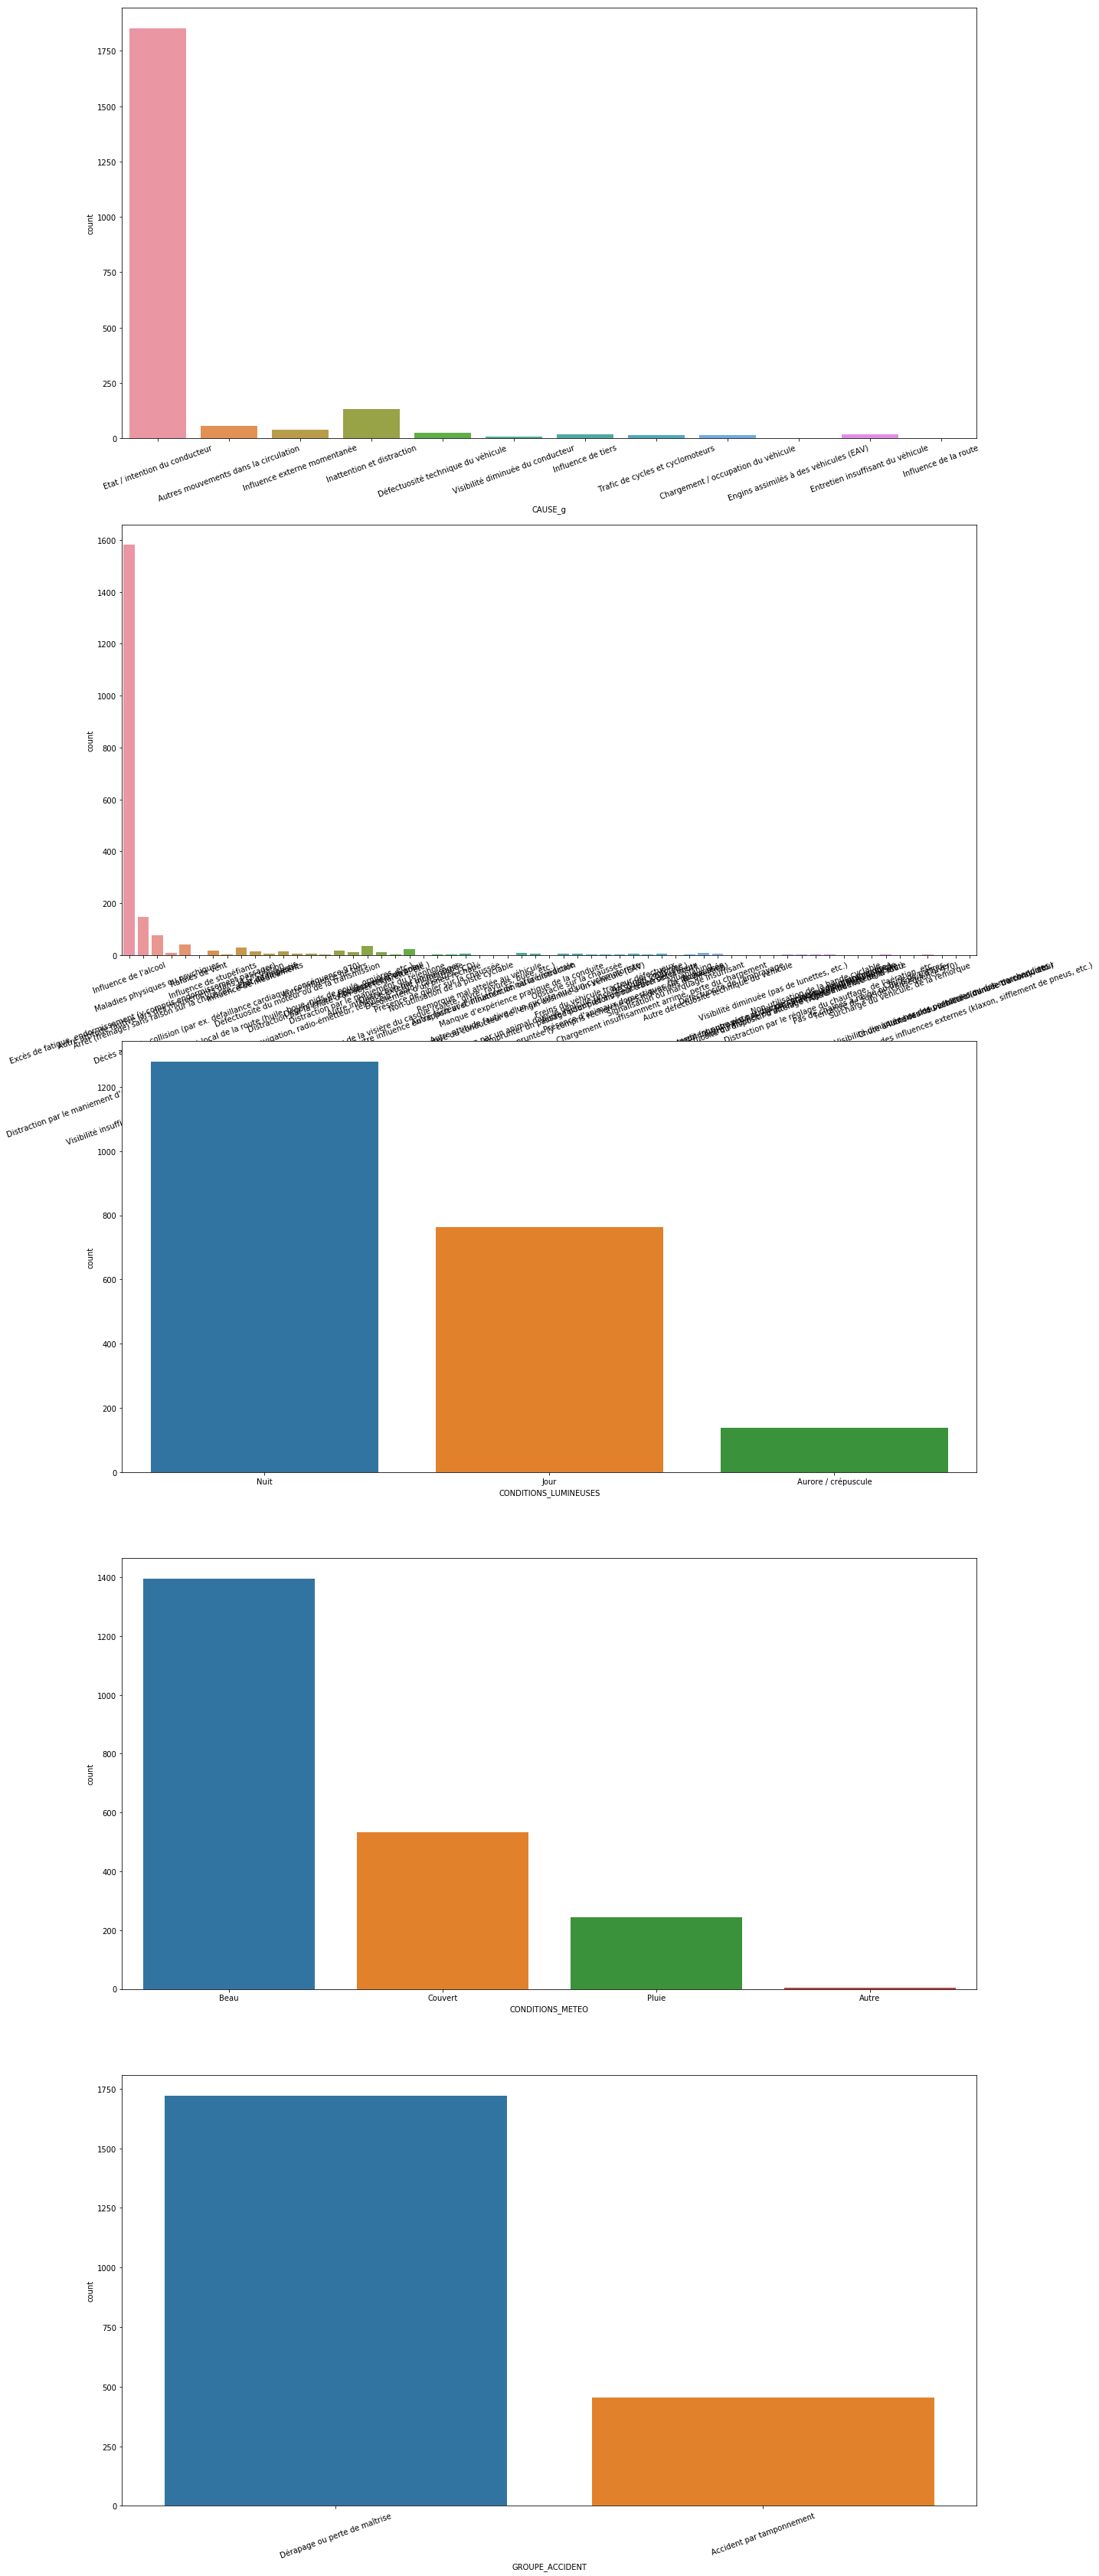

In [127]:
investigate_group(group3)

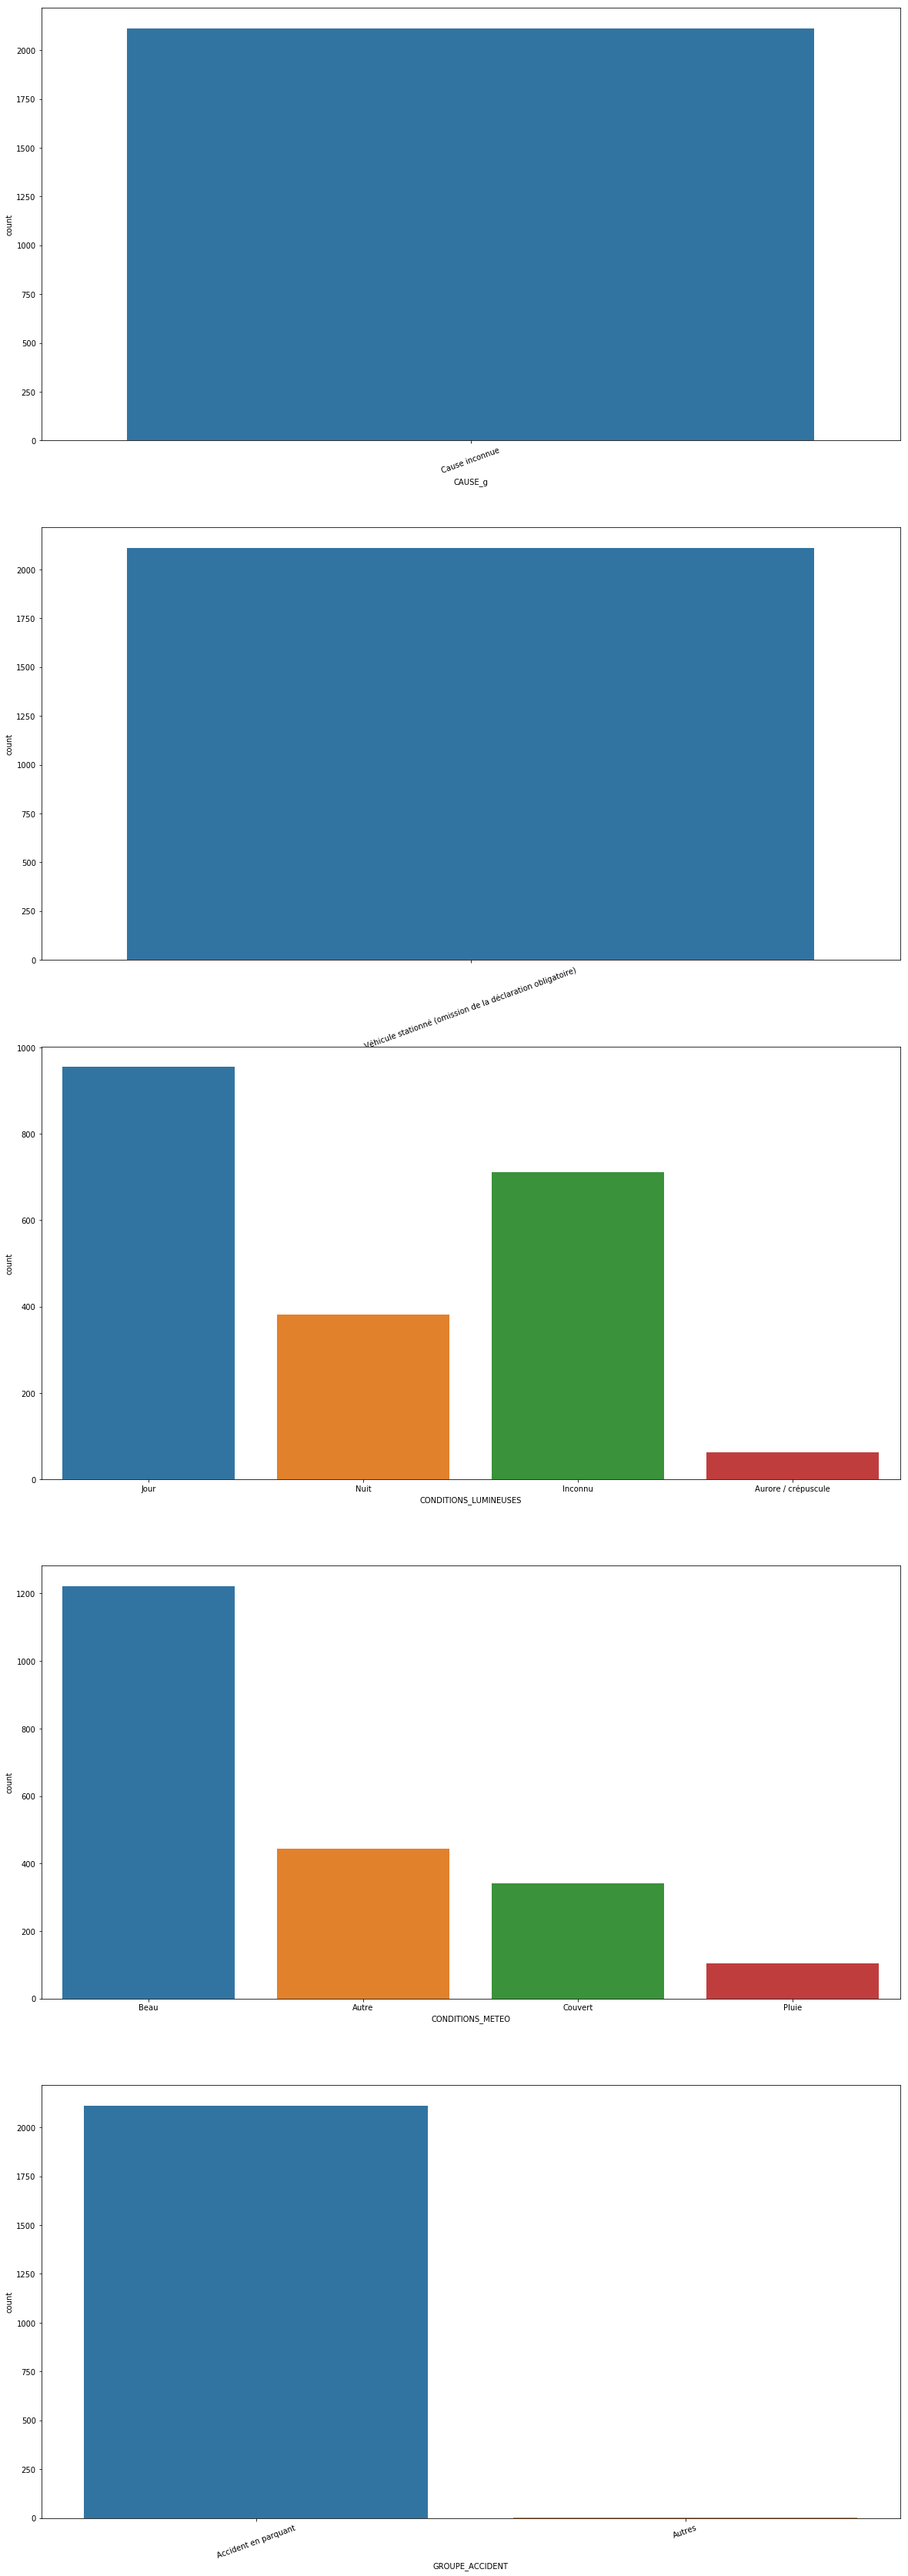

In [128]:
investigate_group(group4)

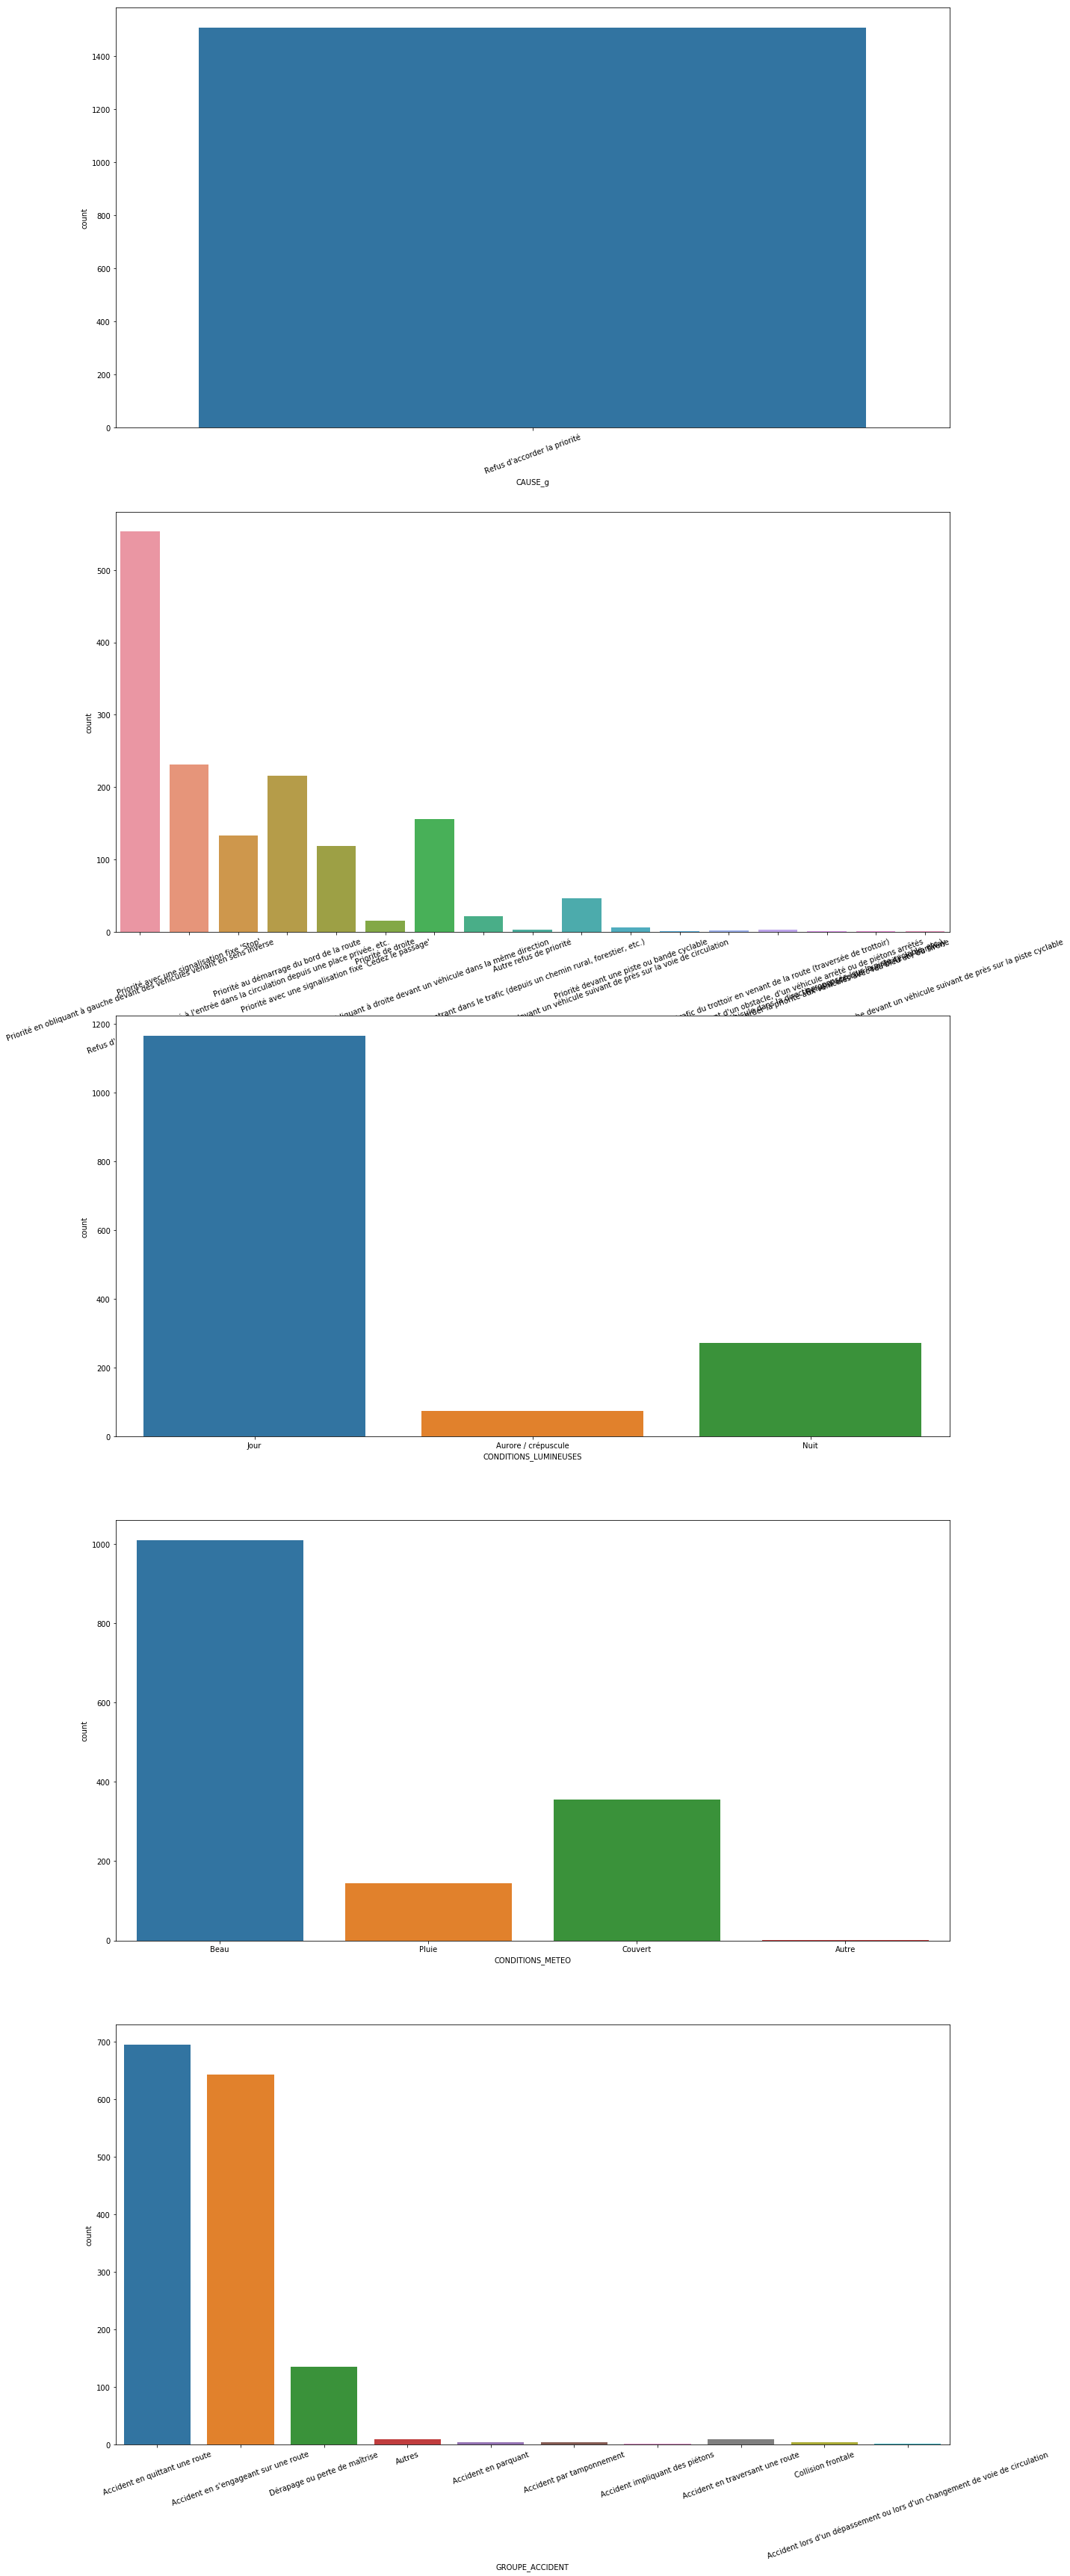

In [129]:
investigate_group(group5)

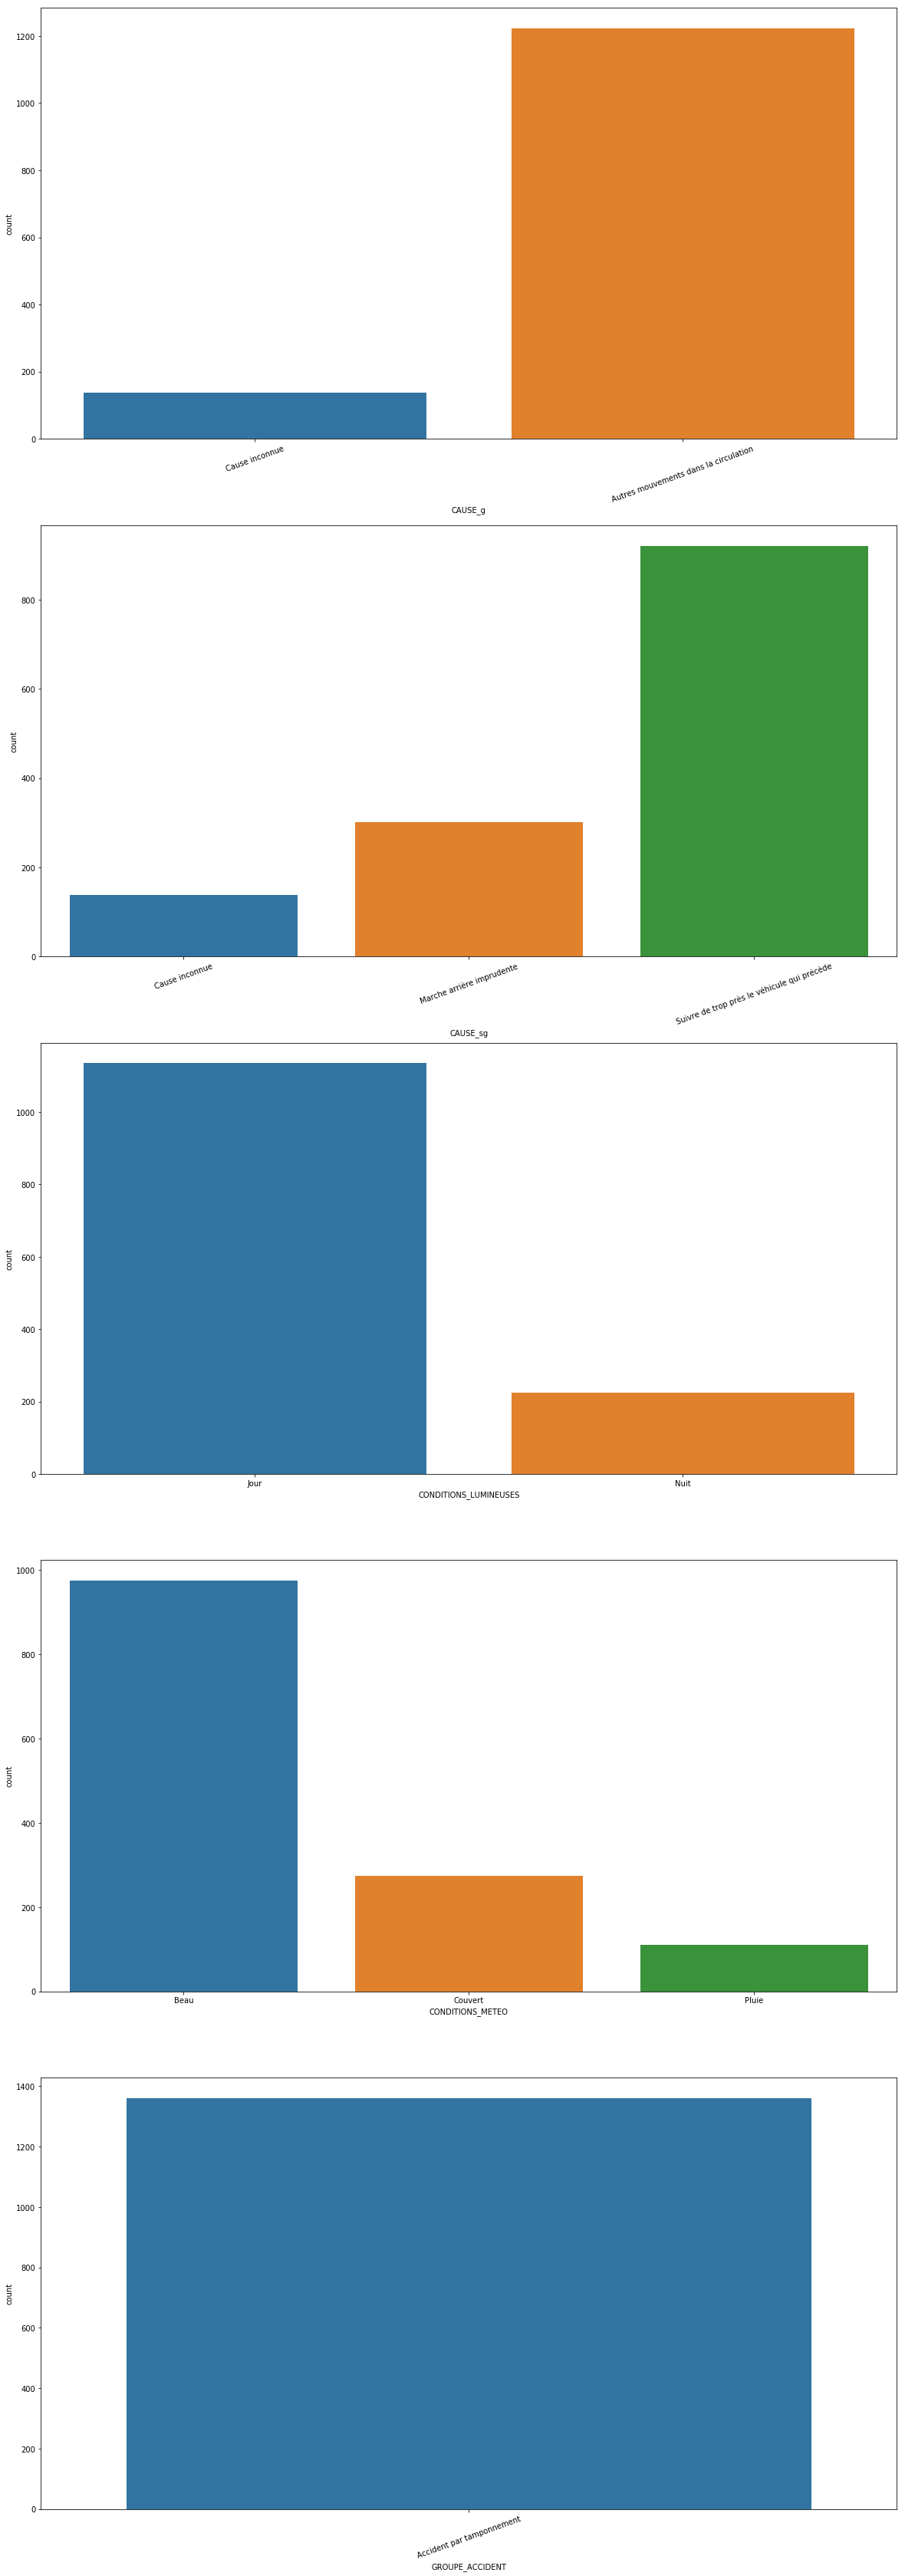

In [130]:
investigate_group(group6)

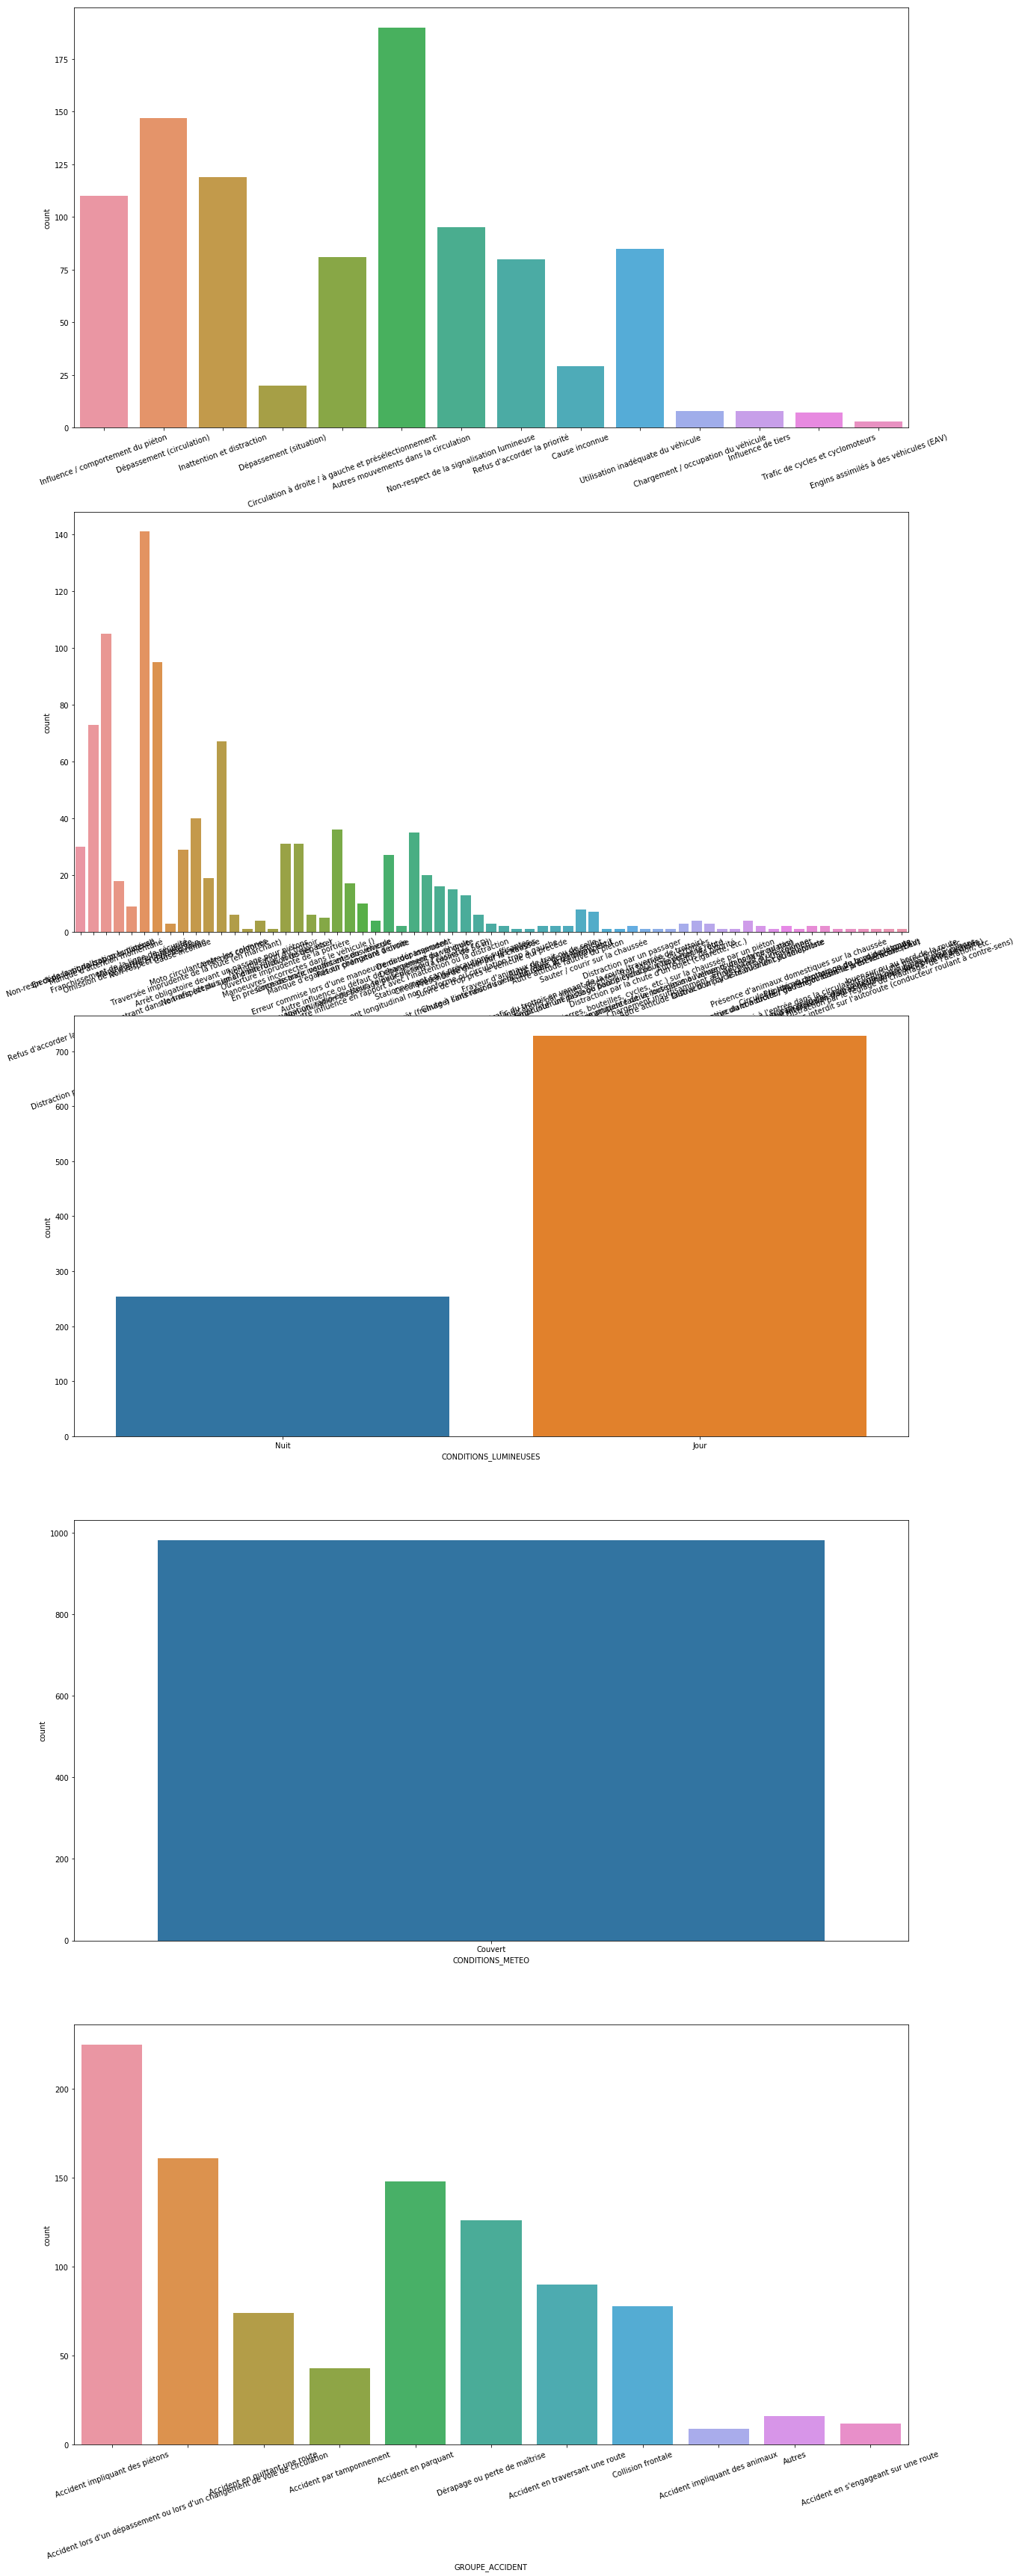

In [131]:
investigate_group(group7)

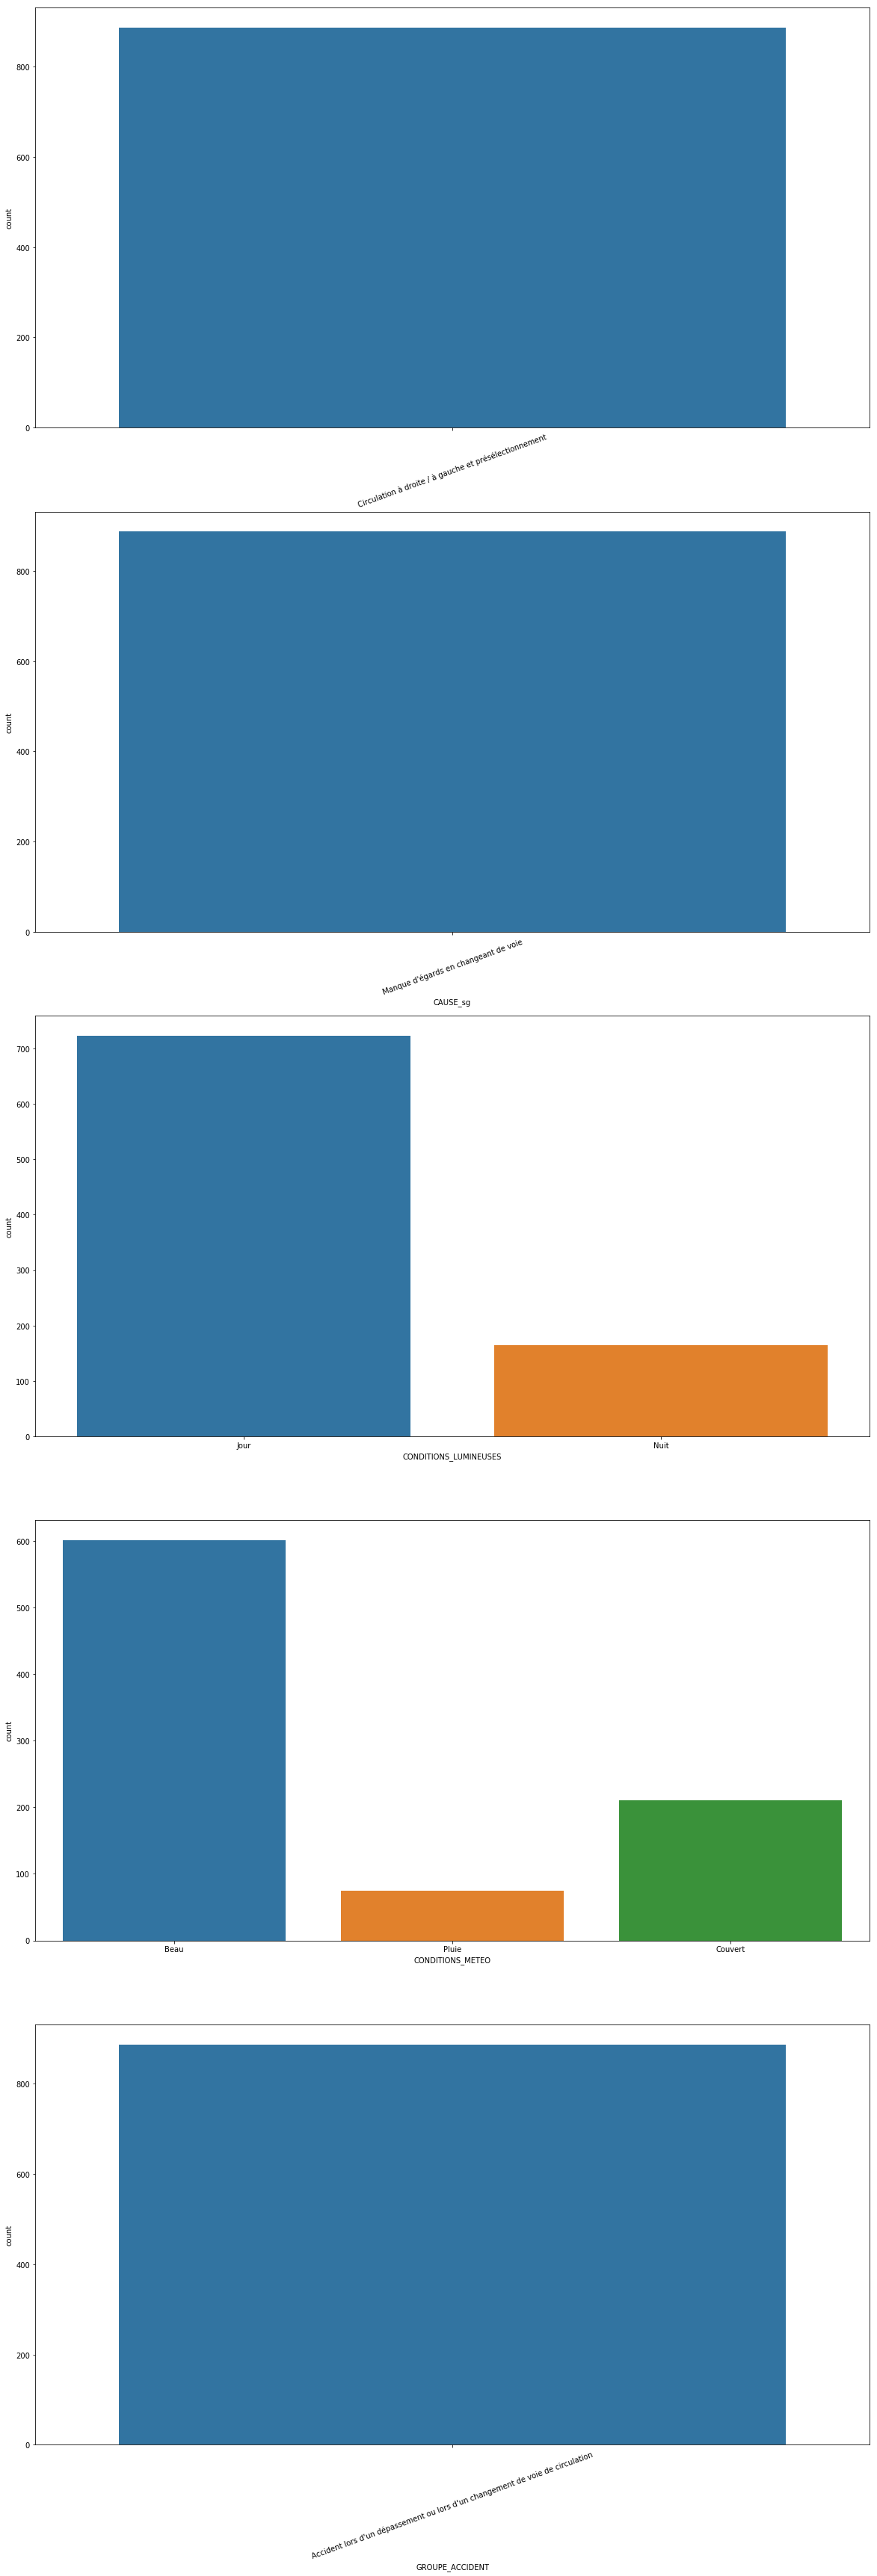

In [132]:
investigate_group(group8)

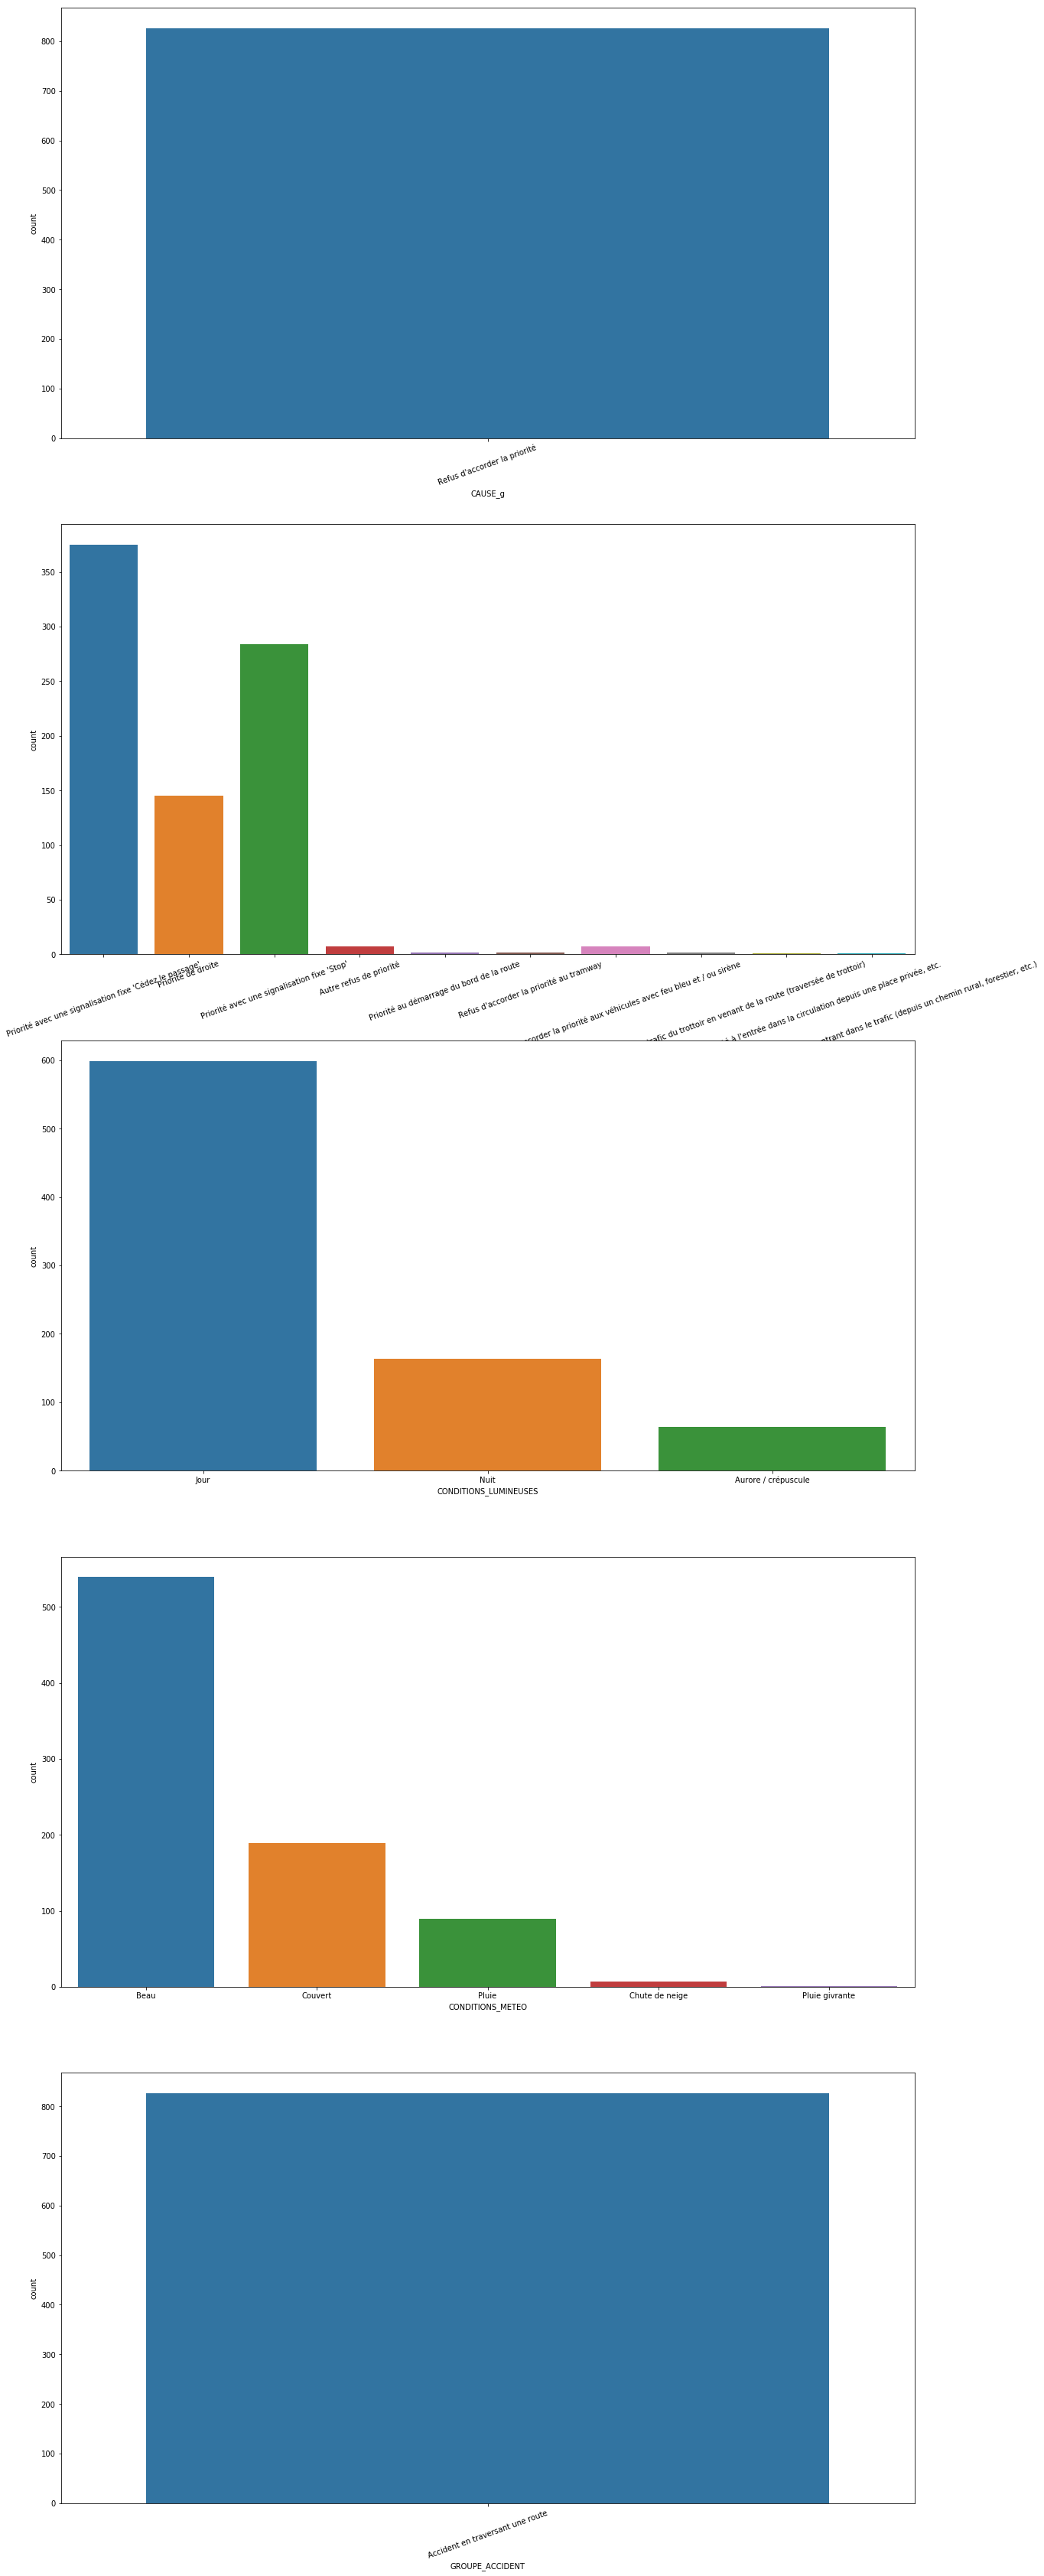

In [133]:
investigate_group(group9)